# TX Traffic Accident and Flow

# Description 

There are hundreds of thousands of vehicle accidents Texas, some traffic incidents have greater impacts on traffic flow than others. Many factors may contribute to the impact a traffic accident may have on traffic flow to include specific locations, features of the road, and/or weather conditions. If the impact of traffic accidents can be predictable based on these features then local authorities may have a better idea on where to place emergency resources and how to plan road renovations.

# Project Goal

* Discover what drives the impact on traffic flow from accidents
* Use drivers to develop a machine learning model to predict severity
* This information could be used to further our understanding of traffic flow


# Imports

/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['len_of_affect'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['weather_condition'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dro

Correlation coefficient: -0.045
p-value: 0.000


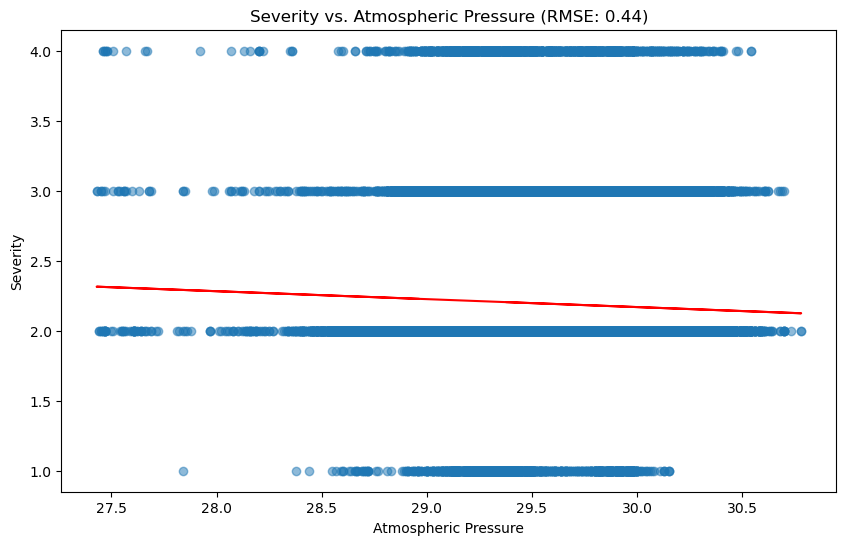

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
import itertools
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# local
import acquire as acq
import prepare as prep
import explore as exp
import modeling as m

#ignore warning.warn

# Acquire

- Data acquired from Kaggle
- Data initially acquired on 6 June 2023
- Dataset shapes before cleaning:
    7.7 million rows, 46 columns
- Each row (after merge) represents a unique traffic accident in the US from 2016 to 2023 
- Each column represents an elements thay may have impacted the flow of traffic

# Prepare

### Prepare Actions:

- Renamed columns to promote readability and merging
- Removed columns
 - very few many null values
 - related to target (fire_size_class)
 - duplicated information
 - too complex to explore for now
- Removed nulls
- Created custom features
- Split data into train, validate and test (approx. 60/20/20)
- Scaled using Standard Scaler for modeling


In [2]:
#created a csv

df = pd.read_csv('output.csv')

In [3]:
df = prep.prep_output(df)

/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['len_of_affect'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['weather_condition'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/traffic/prepare.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dro

SUMMARY REPORT
          
          
Dataframe head: 
                     severity  distance     city   county state zipcode  \
start_time                                                                
2018-12-29 07:04:50         3       0.0  El Paso  El Paso    TX   79938   
2018-12-28 06:11:13         2       0.0  El Paso  El Paso    TX   79938   
2018-12-28 16:43:26         2       0.0  El Paso  El Paso    TX   79938   

                    country  temp  wind_chill  humidity  ...  visibility  \
start_time                                               ...               
2018-12-29 07:04:50      US  28.0        18.6      92.0  ...         4.0   
2018-12-28 06:11:13      US  39.0        34.8      65.0  ...        10.0   
2018-12-28 16:43:26      US  37.0        29.3      89.0  ...         8.0   

                     wind_direction wind_speed_mph  precipitation  \
start_time                                                          
2018-12-29 07:04:50           North           10.4 

******** ZIPCODE - Value Counts:
    75243         3861
75207         3012
75228         2707
75150         2668
75238         2552
              ... 
92570-7006       0
92570-7001       0
92570-6997       0
92570-6987       0
96161-0348       0
Name: zipcode, Length: 139226, dtype: int64
        _______________________________________
******** COUNTRY - Value Counts:
    US    309479
Name: country, dtype: int64
        _______________________________________
******** WIND_DIRECTION - Value Counts:
    S           46294
SSE         35829
CALM        35391
N           25076
SE          23691
ESE         17341
VAR         17037
E           15604
NNW         14880
SSW         13493
NNE         12359
NW          10024
NE           9975
ENE          9059
WNW          6201
SW           6099
W            5950
WSW          4157
North         867
Variable       98
East           33
South          12
West            9
Name: wind_direction, dtype: int64
        ___________________________________

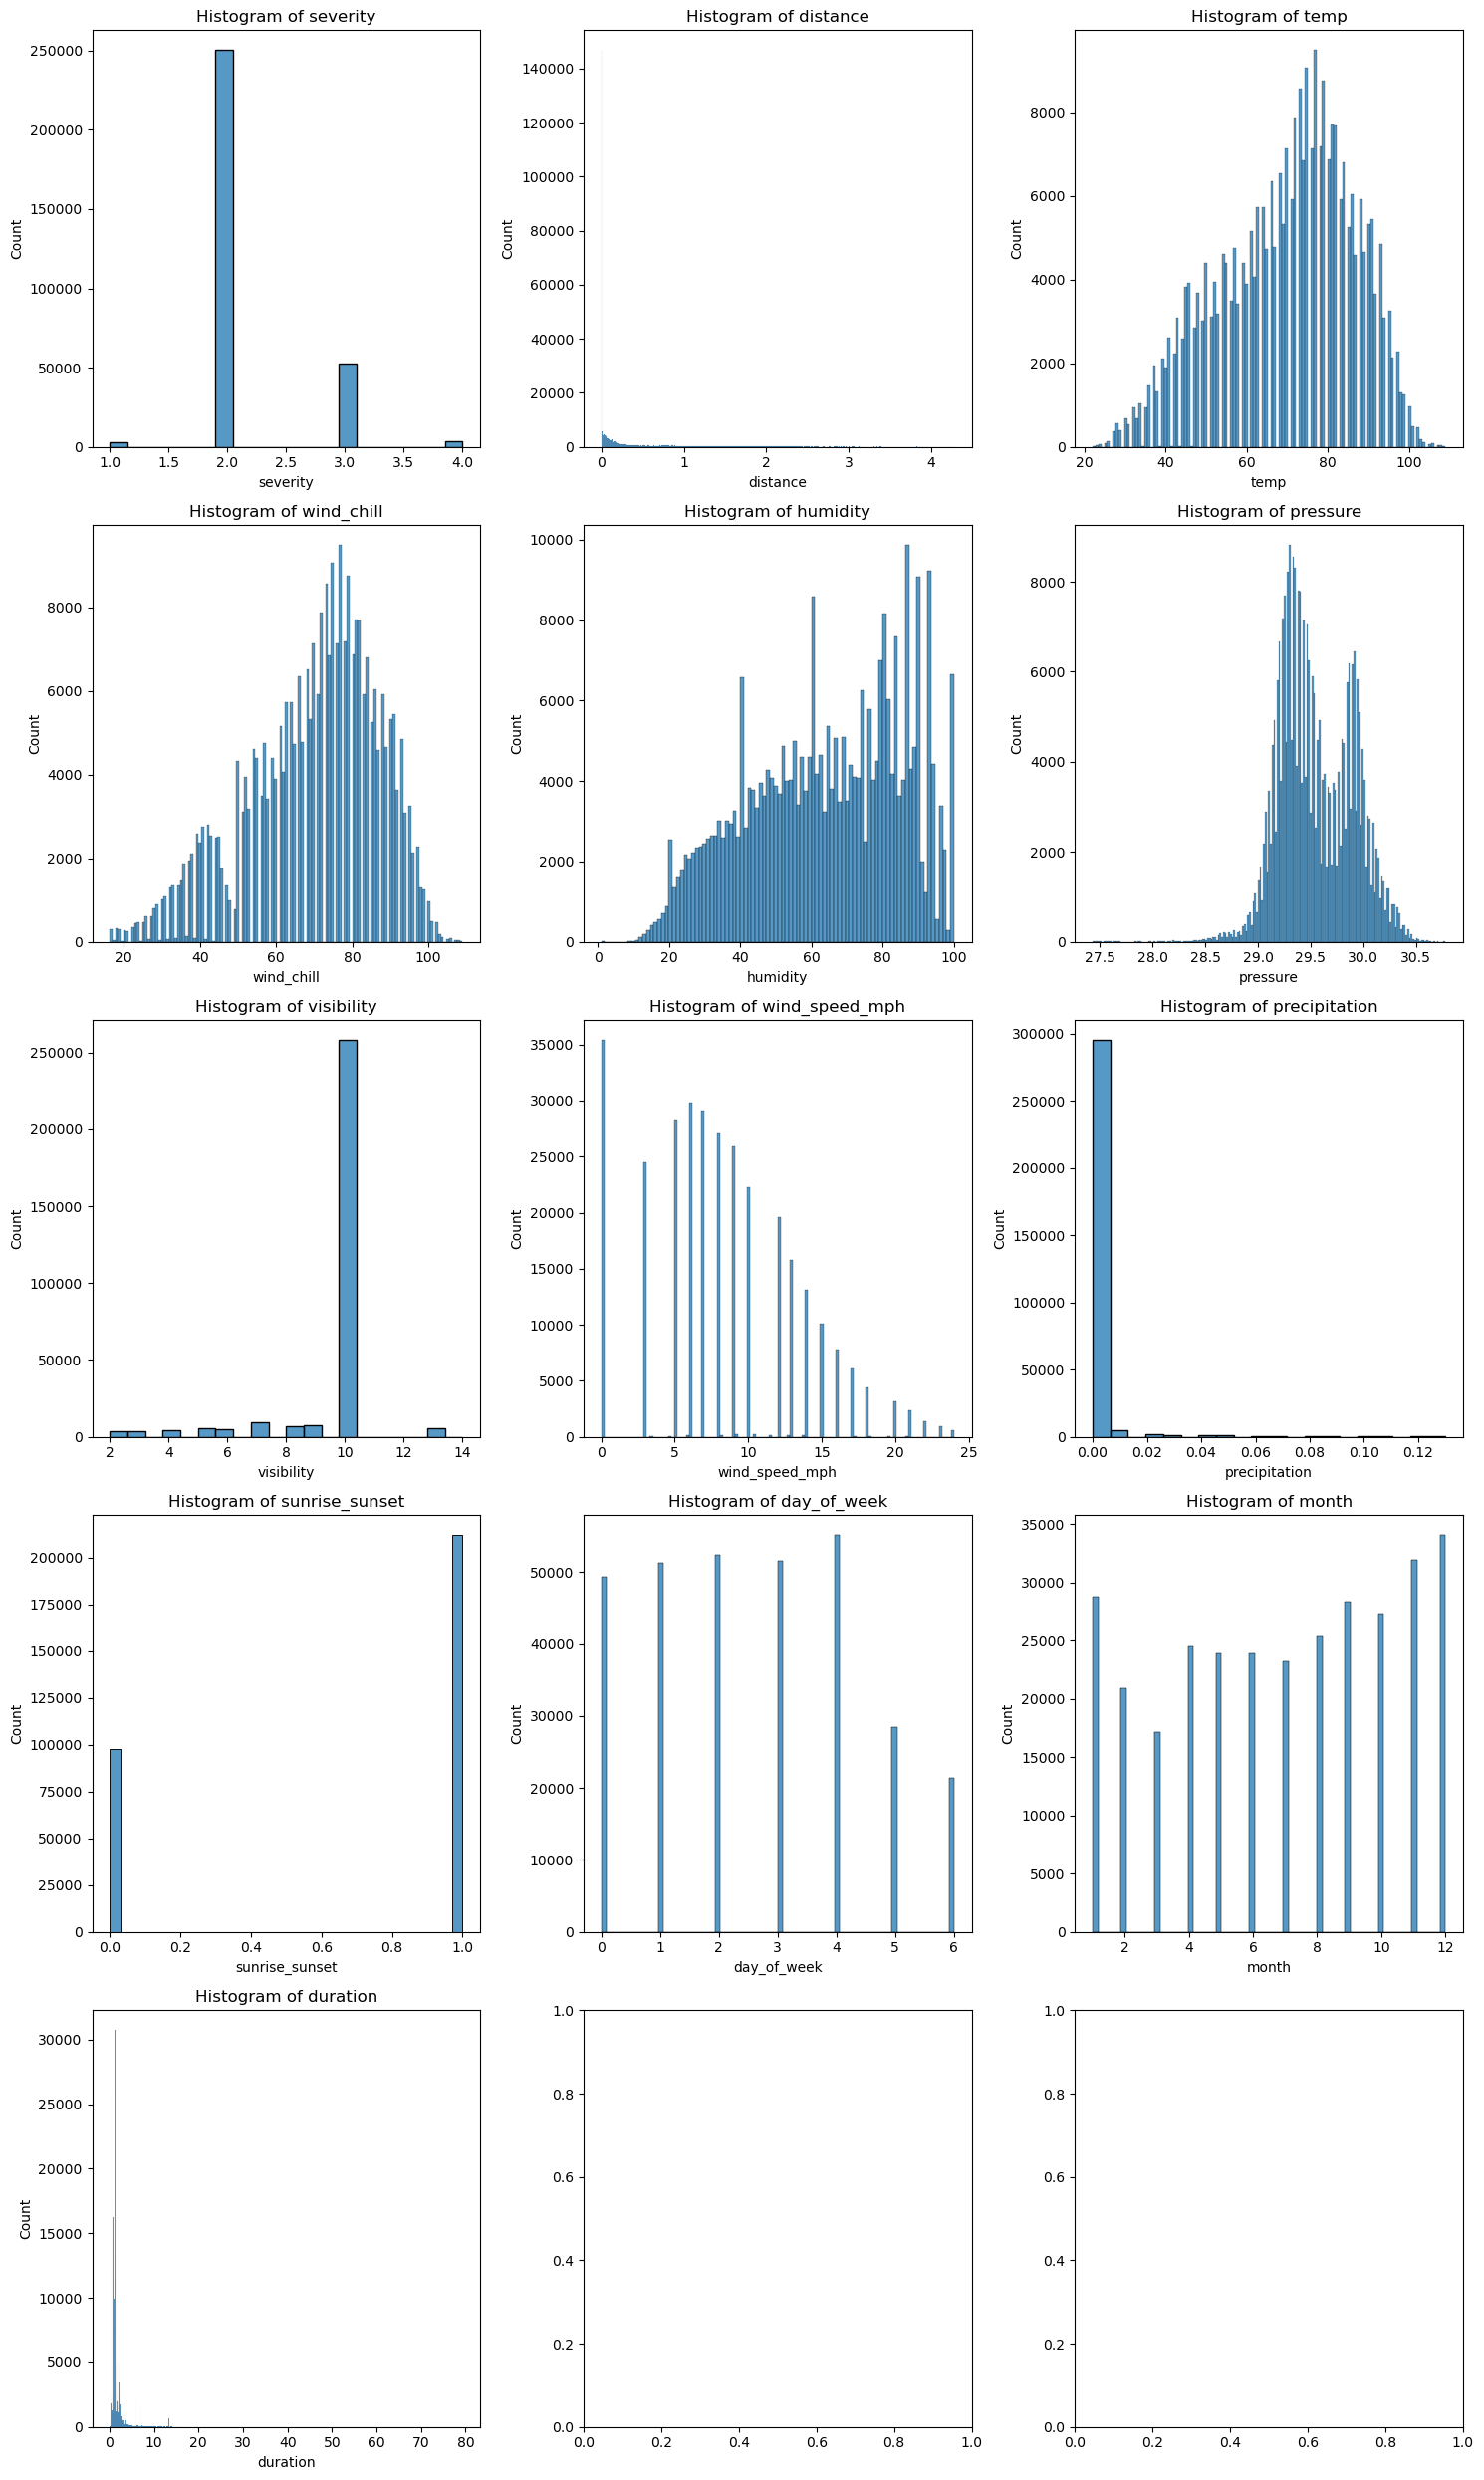

In [4]:
exp.summarize(df)

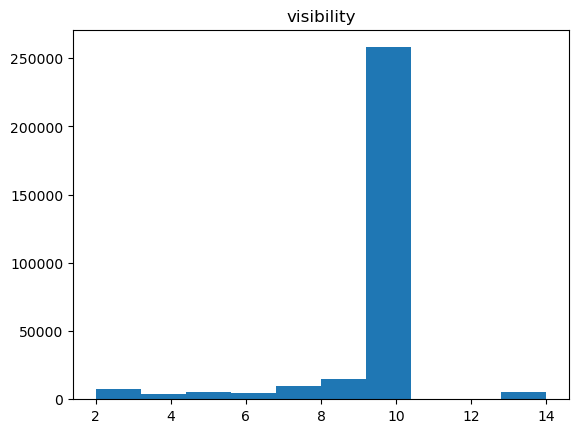

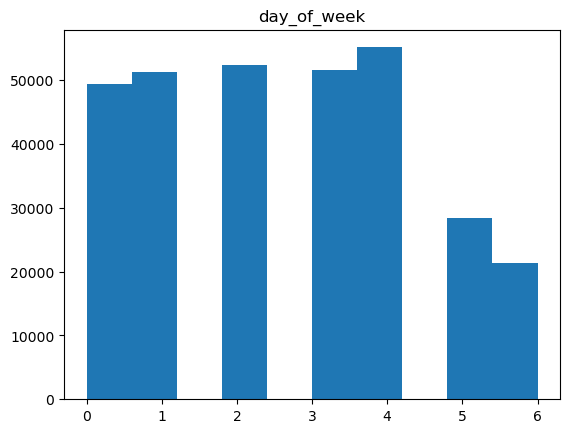

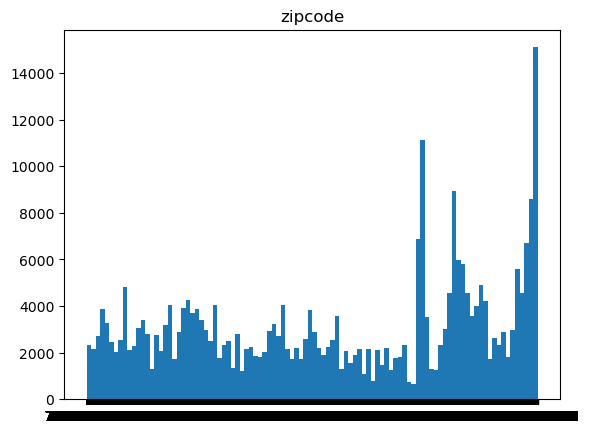

              city  accident_count
234        Houston           87725
124         Dallas           79655
23          Austin           46471
457    San Antonio           19825
177     Fort Worth           11679
350       Mesquite            4381
521          Tyler            3731
248         Irving            3186
17       Arlington            2971
328          Manor            2307
204  Grand Prairie            2276
401   Pflugerville            1884
188        Garland            1775
133      Del Valle            1768
77      Carrollton            1739
427     Richardson            1735
406          Plano            1601
553  Wichita Falls            1584
298     Lewisville            1439
491         Spring            1411
238         Humble            1364
135         Denton            1309
445     Round Rock            1019
280       Kingwood            1002
26   Balch Springs             759
437       Rockwall             751
293      Lancaster             692
144    Duncanville  

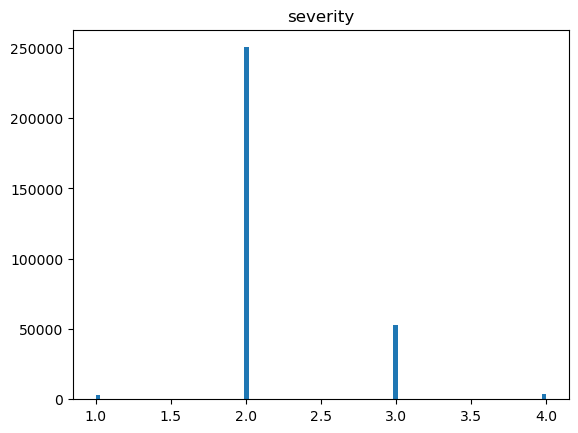

              city  accident_count
234        Houston           87725
124         Dallas           79655
23          Austin           46471
457    San Antonio           19825
177     Fort Worth           11679
350       Mesquite            4381
521          Tyler            3731
248         Irving            3186
17       Arlington            2971
328          Manor            2307
204  Grand Prairie            2276
401   Pflugerville            1884
188        Garland            1775
133      Del Valle            1768
77      Carrollton            1739
427     Richardson            1735
406          Plano            1601
553  Wichita Falls            1584
298     Lewisville            1439
491         Spring            1411
238         Humble            1364
135         Denton            1309
445     Round Rock            1019
280       Kingwood            1002
26   Balch Springs             759
437       Rockwall             751
293      Lancaster             692
144    Duncanville  

(None, None)

In [5]:
exp.vis(df)

#### Initial Observations:

Many observations about the trends are counterintuitive. Most of the incidents occurred when visibility was 10 miles plus and tended to trend toward fair, cloudy weather conditions. Though incidents occurred most often in the winter, they also occurred most often in temperature and wind chill ranging between 70 and 90 degrees and precipitation that is below 1 inch. Half of the accidents occurred in 3 cities, Houston, Dallas, and Austin with Houston by far hosting the most incidents by a 6000 incident difference from it's closest city, however by zipcode the DFW Metropolitan Area hosted the top 5 incidents.

In [6]:
#Remove all classification values, since I will be doing regression
df = prep.remove_class(df)

In [7]:
#split the data in preparation for explore

train, val, test = prep.split_data(df)

In [8]:
train.dtypes

severity            int64
distance          float64
temp              float64
wind_chill        float64
humidity          float64
pressure          float64
visibility        float64
wind_direction      int64
wind_speed_mph    float64
precipitation     float64
sunrise_sunset    float64
day_of_week         int64
month               int64
season              int64
duration          float64
dtype: object

## Explore
- Does temperature effect severity ratings ?
- Does wind speed effect severity ratings?
- Does duration effect severity ratings?
- Does atmospheric pressure effect severity ratings?

### Is there a relationship between temperature and severity.
* $H_0$: There is **NO** relationship between temperature and severity.
* $H_a$: There is a relationship between temperature and severity.

* Temp vs Severity = 
      Correlation coefficient: 0.038
      p-value: 0.000
* Red wine `quality` is different based on the `density alcohol cluster

Correlation coefficient: 0.038
p-value: 0.000


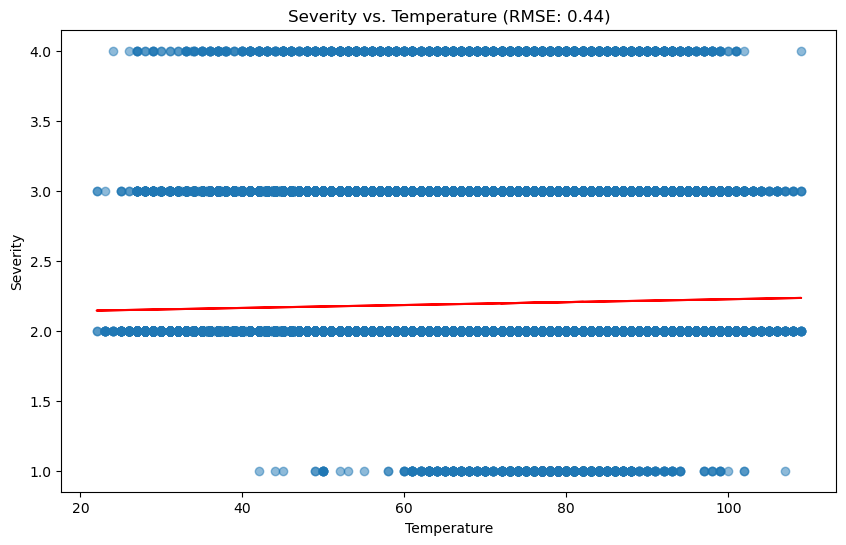

In [14]:
exp.plot_severity_vs_temp(train)

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that there is a difference in severity based on the temprature. I believe that using `Temperature` in the modeling could have a positive impact but not necessarily better than the respective all features.**

### Is there a relationship between wind speed and severity.
* $H_0$: There is **NO** relationship between wind speed and severity.
* $H_a$: There is a relationship between wind speed and severity.

* Wind Speed vs Severity = 
    - Correlation coefficient: 0.041
    - p = 0.000
* Traffic `severity` is different based on the `wind speed'

Correlation coefficient: 0.041
p-value: 0.000


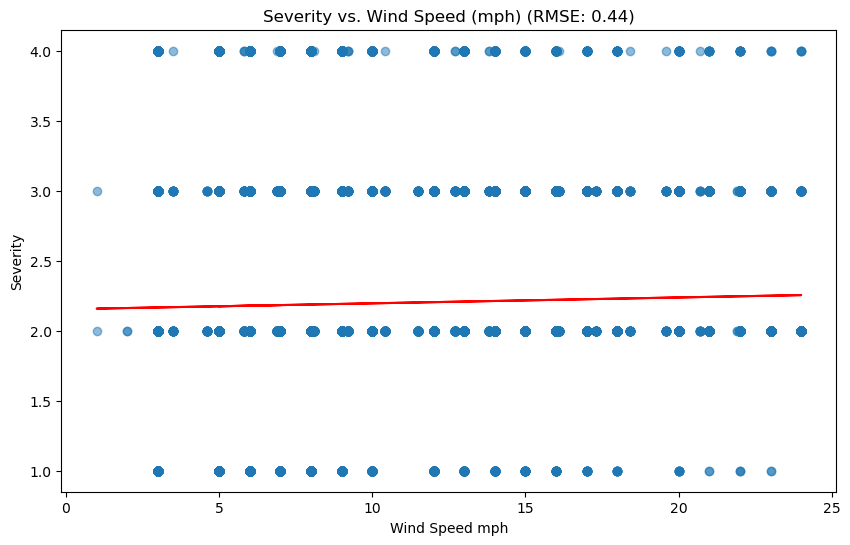

In [10]:
exp.plot_severity_vs_wind_speed(train)

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that there is a difference in severity based on the temprature. I believe that using `Wind Speed` in the modeling could have a positive impact but not necessarily better than the respective all features.**

### Is there a relationship between duration and severity.
* $H_0$: There is **NO** relationship between duration and severity.
* $H_a$: There is a relationship between duration and severity.

* Temp vs duration = 
    - Correlation coefficient: -0.110
    - p = 0.000
* Traffic `severity` is different based on the `duration'

Correlation coefficient: -0.110
p-value: 0.000


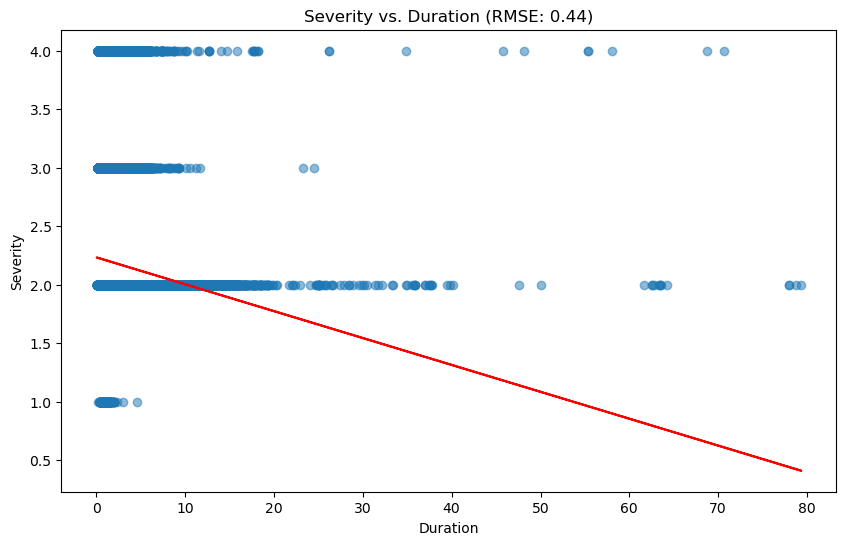

In [11]:
exp.plot_severity_vs_duration(train)

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that there is a difference in severity based on the temprature. I believe that using `Duration` in the modeling could have a positive impact but not necessarily better than the respective all features.**

### Is there a relationship between pressure and severity.
* $H_0$: There is **NO** relationship between pressure and severity.
* $H_a$: There is a relationship between pressure and severity.

* Temp vs pressure 
    - Correlation coefficient: -0.110
    - p-value: 0.000
* Traffic `severity` is different based on the `pressure'

Correlation coefficient: -0.045
p-value: 0.000


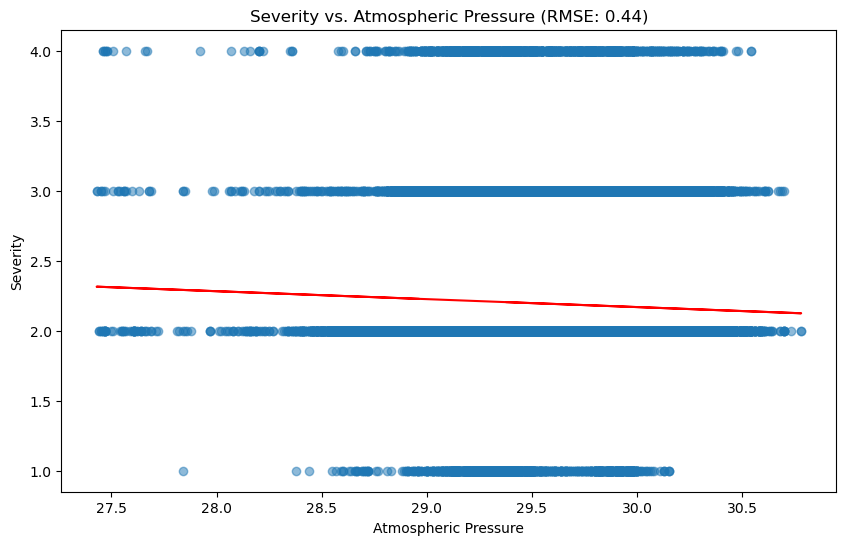

In [12]:
exp.plot_severity_vs_pressure(train)

**With an alpha of 0.05 (confidence 95%) the p-value is less than alpha. Therefore, evidence suggests that there is a difference in severity based on the temprature. I believe that using `Atmospheric Pressure` in the modeling could have a positive impact but not necessarily better than the respective all features.**

### Exploration Summary

Explored features comparing temp, wind speed, duration, and atmospheric pressure.Nothing significant is visible in chart in comparison to baseline predictions.

## Modeling

##### Baseline prediction is I ran Linear Regression, LassoLars, TweedieRegressor, and Polynomial Regression. Polynomial Regression was my best model with an RMSE of .44 and an R2 of .026.

- RMSE will be the evaluation metric
- Target is severity
- Features scaled using Robust Scaler
- Models will be developed using a few different types, various features, and various hyperparameter configurations
    - Linear Regression
    - Polynomial Features through Linear Regression
    - Lasso Lars was worse than baseline so left behind
    - Tweedie Regressor (GLM)
- Models will be evaluated on Train and Validate
- Best performing model will only be evaluated on Test
    - each wine type will have a best model for test

In [13]:
m.run_models(df)

Model: LinearRegression, RMSE: 0.4419040657353662, R²: 0.018162384453796476
Model: LassoLars, RMSE: 0.4459797501926078, R²: -3.212558674237087e-05


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Model: TweedieRegressor, RMSE: 0.44179461200547776, R²: 0.018648700324494505
Model: Pipeline, RMSE: 0.4400496569294414, R²: 0.026385472692406653


(0.4400496569294414, 0.026385472692406653)

## Conclusion

### Takeaways and Key Findings
- Individual features may have a relationsip with severity but non strong enough to act as strong indicators

### Recommendations and Next Steps
- If environmental factors don't play a significant role in severity, I think that classification features such as location, terrain, and road features would act as great indicators so would be worth exploring.